# Proprioo technical test - By Vincent DEBANDE

Hello ! My name is Vincent, I'm a last year student in engineering specialised in Data Science and Artificial Intelligence 💻📊

The goal of the technical test is to create a scrpit that will "recommand" proprety based on customers' needs. The file _"generated_proprety.json"_ contains only one object.

I decided to do a **quick analysis**, so I can generate data based on the customers. This will improve the demonstration of the algorithm I will write. 

Let's dive into it 🏡

## 1. Loading the data

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
import json

# First things first, let's load the data. Since our objects contain nested object ("search"), I need to flatten the JSON. 

with open('../data/generated-customers.json') as data_file:    
    data = json.load(data_file)  

customers_df = pd.json_normalize(data)
customers_df.head()

,id,lastName,firstName,phone,email,search.surface,search.budget,search.rooms
0,2fb69044-31b5-5dd7-972d-42df5da66d64,Andres,Gerald,09 39 21 62 57,cew@juuv.ge,83,586960,5
1,c431a5db-50f3-5ff0-87e4-edba559c8861,Jones,Arthur,09 91 06 58 76,sojes@gu.md,90,533181,5
2,9484f3e5-4a0e-583d-8d81-c994c675688a,Welch,Cory,02 44 59 55 38,ufvu@sihak.gi,74,766722,5
3,81cbbd58-d1ac-5832-ab90-35ea918cd0c3,Brogioni,Jean,09 87 18 24 23,bek@jezmija.org,82,550889,5
4,55ffb1f1-f860-5d81-b38d-106f9c81ba0f,Phillips,Mabel,09 97 55 21 57,baf@ufe.na,86,601017,5


In [43]:
# My goal is to evaluate the price range, the surface and number of room. I'll get rid of unecessary columns. 
# Let's rename the features too. 

customers_df = customers_df[['search.surface', 'search.budget', 'search.rooms']]
customers_df.rename(columns={'search.surface':'surface', 'search.budget':'budget', 'search.rooms':'rooms'}, inplace=True)
customers_df.head()

,surface,budget,rooms
0,83,586960,5
1,90,533181,5
2,74,766722,5
3,82,550889,5
4,86,601017,5


## 2. Analysis

In [44]:
customers_df.describe()

,surface,budget,rooms
count,50.000000,50.000000,50.0
mean,91.220000,630775.500000,5.0
std,12.036153,105449.947342,0.0
min,74.000000,477678.000000,5.0
25%,81.000000,525148.500000,5.0
50%,90.000000,601511.500000,5.0
75%,100.750000,747349.000000,5.0
max,112.000000,789691.000000,5.0


Here we see that : 

- The number of rooms is **always** 5
- The surface and budget are in a pretty wide range

Then, our hope is to **find categories of surface and budget**. First, we will visualize the density of each feature.

We need to evaluate the correlation between the surface and budget in order to generate proprety respecting the price by m² (I supposed that the surface is m²). First guess is that the two features are **positevly correlated (highly)**, but the budget dosen't only depends on the surface. 

In [49]:
sns.set_theme(style="darkgrid")

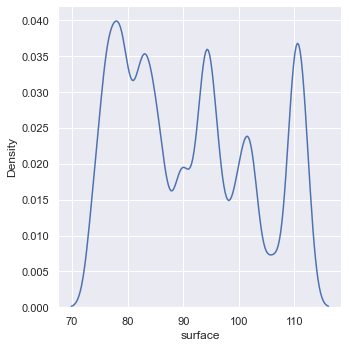

In [65]:
sns.displot(customers_df, x="surface", kind="kde", bw_adjust=.25)

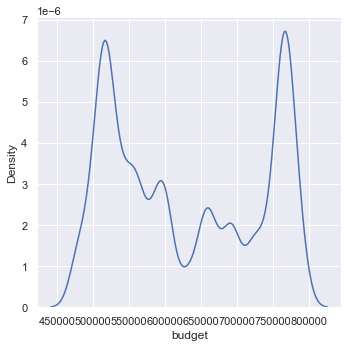

In [66]:
sns.displot(customers_df, x="budget", kind="kde", bw_adjust=.25)

<AxesSubplot:xlabel='surface', ylabel='budget'>

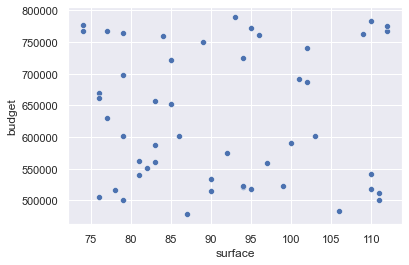

In [68]:
sns.scatterplot(data=customers_df, x="surface", y="budget")

## 3. Conclusion

This gives us enough indication on how to generate the property : 

- There are 3 categories of surfaces 
- There are 3 categoies of budgets 
- There is no linear correlation between the surface and budget (well, my first guess was wrong)

We see that for cat1 : all budgets are represented. For cat2: middle one are not represented. For cat3 only low are high are present. 

----

I will generate the data as following with random surface and random budget without any condition. 
